In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np
data = pd.read_csv("SMARD_Realisierter_Stromverbrauch_201811170000_202011122345_1.csv")
# data = data['Date']['01.01.2019':'01.06.1019']

print(data.columns)
data.head()

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Index(['Date', 'Time', 'Demand[MWh]'], dtype='object')


,Date,Time,Demand[MWh]
0,17.11.2018,00:00,118
1,17.11.2018,00:15,11175
2,17.11.2018,00:30,110
3,17.11.2018,00:45,109
4,17.11.2018,01:00,1075


In [2]:
data['Date'] = data['Date'].astype('str')
data['Time'] = data['Time'].astype('str')
data['Date'] = data['Date'] + ' '+ data['Time']

data = data.drop_duplicates(subset='Date', keep='last')

# 44 DE_price_day_ahead,45 DE_solar_capacity, wind capacity 48
# dt = data[data.columns[3]]
data.head(20)

,Date,Time,Demand[MWh]
0,17.11.2018 00:00,00:00,118
1,17.11.2018 00:15,00:15,11175
2,17.11.2018 00:30,00:30,110
3,17.11.2018 00:45,00:45,109
4,17.11.2018 01:00,01:00,1075
5,17.11.2018 01:15,01:15,10475
6,17.11.2018 01:30,01:30,10325
7,17.11.2018 01:45,01:45,10175
8,17.11.2018 02:00,02:00,1015
9,17.11.2018 02:15,02:15,100


In [3]:
data.set_index('Date', inplace=True)
# data = data.assign(Date=data.Date.dt.round('H'))
data.head()

,Time,Demand[MWh]
Date,,
17.11.2018 00:00,00:00,118
17.11.2018 00:15,00:15,11175
17.11.2018 00:30,00:30,110
17.11.2018 00:45,00:45,109
17.11.2018 01:00,01:00,1075


In [4]:
data.index = pd.to_datetime(data.index)
# data = data.reset_index().drop_duplicates(subset='Date', keep='last').set_index('Date')

# data.head()

In [5]:
data = data['Demand[MWh]']
# data = data[: int((len(data)*35)/100) ]
data.tail(10)

Date
2019-11-16 15:30:00    117
2019-11-16 15:45:00    115
2019-11-16 16:00:00    113
2019-11-16 16:15:00    112
2019-11-16 16:30:00    112
2019-11-16 16:45:00    111
2019-11-16 17:00:00    112
2019-11-16 17:15:00    113
2019-11-16 17:30:00    115
2019-11-16 17:45:00    115
Name: Demand[MWh], dtype: int64

In [6]:
data.columns = ['Energy Production']
print(len(data))
data = data.sort_index()
# data.columns
data = data['2019-01-01 00:00':'2019-06-01 00:00,']

35012


In [7]:
# print(len(dt))
# dt.head()


In [8]:
# dt = data[data['AT_load_actual_entsoe_power_statistics']==1.0]
# dt.head()

In [9]:
data.tail()

Date
2019-05-31 23:00:00     1285
2019-05-31 23:15:00    12625
2019-05-31 23:30:00      126
2019-05-31 23:45:00     1245
2019-06-01 00:00:00    15525
Name: Demand[MWh], dtype: int64

In [10]:
len(data)
# 246865

14013

In [11]:
# data['Energy Production'] = data['Energy Production'].astype('float64')
data = data.astype('float64')
data.head()

Date
2019-01-01 00:00:00    13225.0
2019-01-01 00:15:00    12475.0
2019-01-01 00:30:00      125.0
2019-01-01 00:45:00    13175.0
2019-01-01 01:00:00    13025.0
Name: Demand[MWh], dtype: float64

In [12]:
import numpy as np
print('Min', np.min(data))
print('Max', np.max(data))

Min 0.0
Max 19925.0


In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(data)
scaled = scaler.fit_transform(np.array(data).reshape(-1, 1))

In [14]:
# !pip3 install plotly
# !pip3 install cufflinks

In [15]:
#importing Pandas 
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
from  plotly.offline import plot_mpl
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

data.iplot(title="power")

In [16]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))


Min 0.0
Max 1.0


In [17]:
len(scaled)
scaled[:5]
# !pip3 install pyramid-arima


array([[0.66373902],
       [0.62609787],
       [0.00627353],
       [0.66122961],
       [0.65370138]])

In [18]:
train_size = int(len(scaled)*.7)
test_size = int(len(scaled - train_size))
train, test = scaled[:train_size, :], scaled[train_size:, :]

print(len(train), len(test))

9809 4204


In [19]:
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[(i+look_back), 0])
        
    return np.array(dataX), np.array(dataY)

In [20]:
look_back = 12
Xtrain, Ytrain = create_dataset(train, look_back)
Xtest, Ytest = create_dataset(test, look_back)

In [21]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))
print(Xtrain.shape)
print(Xtest.shape)

(9796, 12, 1)
(4191, 12, 1)


In [22]:
batch_size = 1000

# model = Sequential()
# layers = [1, 75, 100, prediction_steps]
# model.add(LSTM(layers[1], input_shape=(None, layers[0]), return_sequences=True))  # add first layer
# model.add(Dropout(0.2))  # add dropout for first layer
# model.add(LSTM(layers[2], return_sequences=False))  # add second layer
# model.add(Dropout(0.2))  # add dropout for second layer
# model.add(Dense(layers[3]))  # add output layer
# model.add(Activation('linear'))  # output layer with linear activation
    
    
# model = Sequential()
# model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=1))
# model.add(Dense(1))
# model.compile(loss = 'mean_squared_error', optimizer='adam')
# model.fit(Xtrain, Ytrain, epochs=100, batch_size=batch_size, verbose = 2, shuffle=True)

model = Sequential()
model.add(LSTM(75, input_shape=(None, 1), return_sequences=True))  # add first layer
model.add(Dropout(0.2))  # add dropout for first layer
model.add(LSTM(100, return_sequences=False))  # add second layer
model.add(Dropout(0.2))  # add dropout for second layer
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')
model.fit(Xtrain, Ytrain, epochs=50, batch_size=batch_size, verbose = 2, shuffle=True)






Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 3s - loss: 0.0857
Epoch 2/50
 - 2s - loss: 0.0671
Epoch 3/50
 - 2s - loss: 0.0657
Epoch 4/50
 - 2s - loss: 0.0650
Epoch 5/50
 - 2s - loss: 0.0647
Epoch 6/50
 - 2s - loss: 0.0647
Epoch 7/50
 - 2s - loss: 0.0645
Epoch 8/50
 - 2s - loss: 0.0645
Epoch 9/50
 - 2s - loss: 0.0644
Epoch 10/50
 - 2s - loss: 0.0642
Epoch 11/50
 - 2s - loss: 0.0641
Epoch 12/50
 - 2s - loss: 0.0641
Epoch 13/50
 - 2s - loss: 0.0638
Epoch 14/50
 - 2s - loss: 0.0640
Epoch 15/50
 - 2s - loss: 0.0636
Epoch 16/50
 - 2s - loss: 0.0634
Epoch 17/50
 - 2s - loss: 0.0633
Epoch 18/50
 - 2s - loss: 0.0632
Epoch 19/50
 - 2s - loss: 0.0629
Epoch 20/50
 - 2s - loss: 0.0631
Epoch 21/50
 - 2s - loss: 0.0628
Epoch 22/50
 - 2s - loss: 0.0626
Epoch 23/50
 - 2s - loss: 0.0627
Epoch 24/50
 - 

In [23]:
model.save('SMARD.h5')

In [24]:


import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(Xtrain, batch_size = batch_size)
# model.reset_states()
testPredict = model.predict(Xtest, batch_size = batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

# trainPredict = scaler.inverse_transform(np.array(trainPredict).reshape(-1, 1))
# testPredict = scaler.inverse_transform(np.array(testPredict).reshape(-1, 1))


ytrain = scaler.inverse_transform([Ytrain])
ytest = scaler.inverse_transform([Ytest])
    
trainScore = math.sqrt(mean_squared_error(ytrain[0], trainPredict[:,0]))    
print("train Score", trainScore)

testScore = math.sqrt(mean_squared_error(ytest[0], testPredict[:,0]))    
print("test Score", testScore)
print(ytest[0])

train Score 4966.924887297797
test Score 4890.234101351997
[12075.   119. 11625. ... 12625.   126.  1245.]


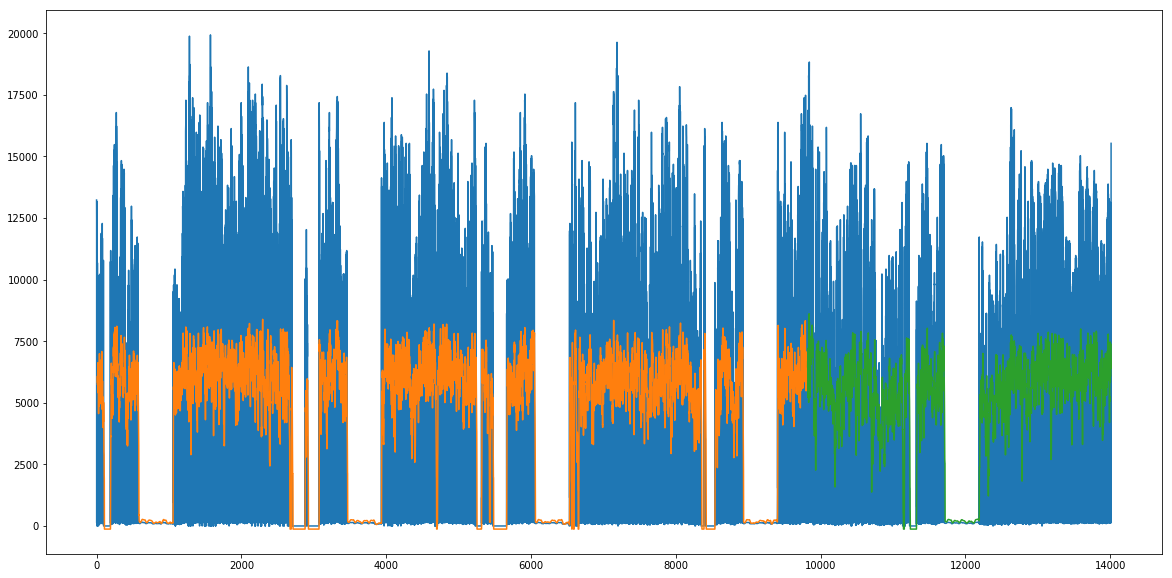

In [25]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict

plt.figure(figsize = (20, 10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()